# Molecular Mechanics Force Field

## Small molecule

In [3]:
import veloxchem as vlx


In [4]:
molecule = vlx.Molecule.read_smiles('C=CC=O')
molecule.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

To create a initial topology for your molecule, you need to load the MMForceFieldGenerator and use the create_topology function on your molecule. You can save input file for Gromacs and OpenMM.

In [5]:
ff_gen = vlx.ForceFieldGenerator()
ff_gen.create_topology(molecule)
ff_gen.write_openmm_files('acrolein_initial', 'MOL')
ff_gen.write_gromacs_files('acrolein_initial', 'MOL')

* Info * Using 6-31G* basis set for RESP charges...                                                                       
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                

In [6]:
rot_bonds = ff_gen.rotatable_bonds
print(rot_bonds)

[[2, 3]]


In [ ]:
ff_gen.reparametrize_dihedrals([2,3], scan_range=[180, 360], n_points=7, visualize=True)

                                           VeloxChem Dihedral Reparametrization                                           
                                                                                                                          
* Info * Rotatable bond selected: 2-3                                                                                     
* Info * Dihedrals involved:[[1, 2, 3, 4], [1, 2, 3, 8], [4, 3, 2, 7], [7, 2, 3, 8]]                                      
* Info * No scan file provided. Performing QM scan...                                                                     
* Info * SCF driver not provided. Using default: RHF                                                                      
* Info * Basis set not provided. Using dafault: 6-31G*                                                                    
* Info * Performing SCF calculation...                                                                                    
Constraint: scan

We now provide an xyz molecule of a ligand used for Amyloid detection. This conformer geometry has been optimized at the b3lyp/dev2-svp level of theory

In [ ]:
ff_gen.add_dihedral([1,2,3,4], 2, 0, 1)
ff_gen.reparametrize_dihedrals([2,3], scan_file = '1-2-3-4.xyz', fit_extremes = True, visualize=True)

In [ ]:
ff_gen.write_openmm_files('acrolein_final', 'MOL')
ff_gen.write_gromacs_files('acrolein_final', 'MOL')

## Large molecule

In [10]:
hs276 = vlx.Molecule.read_xyz_file("data/hs276_b3lyp_dev2-svp.xyz")
hs276.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## Deriving a Force Field

To create a initial topology for your molecule, you need to load the MMForceFieldGenerator and use the create_topology function on your molecule. This will perform a scf calculation on the provided geomtry and calculate the RESP charges at the HF/6-31G* by default, according to the recommended procedure [1]. The topology can then be saved as input file for Gromacs and OpenMM.

In [11]:
ff_gen = vlx.MMForceFieldGenerator()
ff_gen.create_topology(hs276)
ff_gen.write_gromacs_files('hs276_initial', 'MOL')
ff_gen.write_openmm_files('hs276_initial', 'MOL')

* Info * Using 6-31G* basis set for RESP charges...                                                                       
                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Hartree-Fock                                         
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                

You can print the rotatable bond of your system as follow

## Asses the Force Field quality

This initial GAFF topology is using tabulated parameters and RESP charges. However, dihedral angles are of poor quality and can be refine in the following procedure. We can start by looking at the different rotatable bonds in the molecule.

In [12]:
print(ff_gen.rotatable_bonds)

[[14, 15], [21, 22], [28, 29], [29, 31], [31, 32]]


We will then perform a scan for the first rotatable bond [14,15]

This scan function needs to be implemented.

In [13]:
# pec_results = ff_gen.scan_dihedral(scf_driver, basis,
#                                    rotatable_bond=[14, 15],
#                                    scan_range=[180, 360],
#                                    npoints=19)

# Reparametrization

This is not up to date in the code

This is not great! We can reparametrized this dihedral angle using the reparametrized_dihedral function using the scan_results obtained previously

In [6]:
#ff_gen.reparametrize_dihedral(scan_data=pec_results)

To reparametrize we have several options, we need to specify which rotatable bonds we want to reparametrized, the scan range, the number of points.  The visualize option will plot the PES at the MM and QM level before and after reparametrization. We can specify the functional and basis set for the QM scan in the following way:

In [7]:
# qm_driver = vlx.ScfRestrictedDriver()
# qm_driver.xcfun = 'b3lyp'
# basis = vlx.MolecularBasis.read(hs276, 'def2-svp')
# ff_gen.reparameterize_dihedrals(scf_drv=qm_driver, basis=basis, rotatable_bond=[14, 15], scan_range=[180, 360], n_points=19, fit_extrema=False, visualize=True)

Altenatively, we can load an xyz file containing the QM PES, which is an output from VeloxChem scanning function.

                                          VeloxChem Dihedral Reparameterization                                           
                                                                                                                          
* Info * Rotatable bond selected: 14-15                                                                                   
* Info * Dihedrals involved:[[1, 14, 15, 16], [1, 14, 15, 17], [12, 14, 15, 16], [12, 14, 15, 17]]                        
* Info * Reading QM scan from file...                                                                                     
* Info *   data/1-14-15-16.xyz                                                                                            
                                                                                                                          
* Info * Performing dihedral scan for MM baseline by excluding the involved dihedral barriers...                          
                

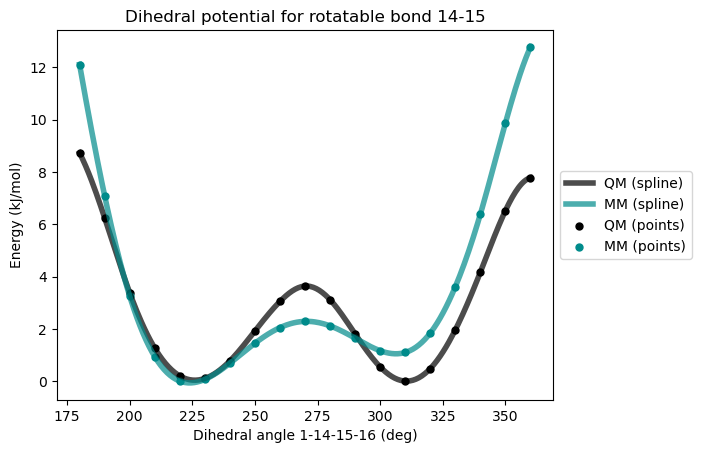

* Info * Fitting the dihedral parameters...                                                                               
* Info * Optimizing dihedral via least squares fitting...                                                                 
* Info * New fitted barriers: [1.77109392 1.77109392 1.77109392 1.77109392]                                               
* Info * Validating the fitted force field...                                                                             
                                                                                                                          
* Info * Summary of validation                                                                                            
* Info * ---------------------                                                                                            
* Info * Maximum difference: 3.300 kJ/mol                                                                                 
* Info * Standar

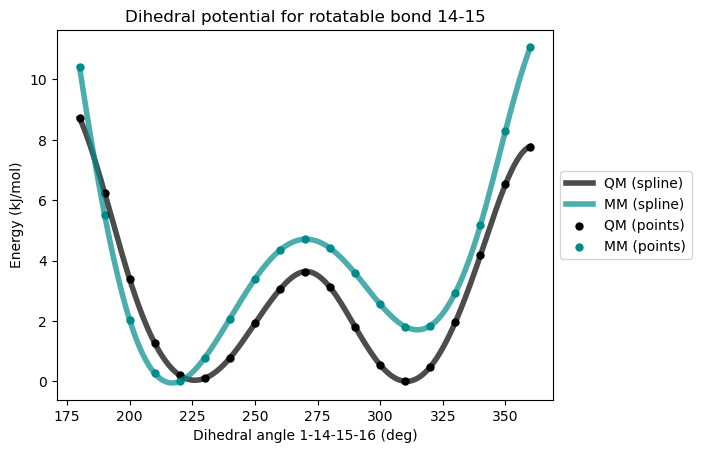

* Info * Dihedral MM parameters have been reparameterized and updated in the topology.                                    


In [14]:
ff_gen.reparameterize_dihedrals(rotatable_bond=[14, 15], scan_file='data/1-14-15-16.xyz', fit_extrema=False, visualize=True)

In [15]:
ff_gen.write_gromacs_files('hs276_v1', 'MOL')

In [16]:
ff_gen.add_dihedral([1,14,15,16], barrier=1, phase=180, periodicity=1)

* Info * Added dihedral 1-14-15-16                                                                                        


In [17]:
ff_gen.write_gromacs_files('hs276_v2', 'MOL')

                                          VeloxChem Dihedral Reparameterization                                           
                                                                                                                          
* Info * Rotatable bond selected: 14-15                                                                                   
* Info * Dihedrals involved:[[1, 14, 15, 16], [1, 14, 15, 17], [12, 14, 15, 16], [12, 14, 15, 17]]                        
* Info * Reading QM scan from file...                                                                                     
* Info *   data/1-14-15-16.xyz                                                                                            
                                                                                                                          
* Info * Performing dihedral scan for MM baseline by excluding the involved dihedral barriers...                          
                

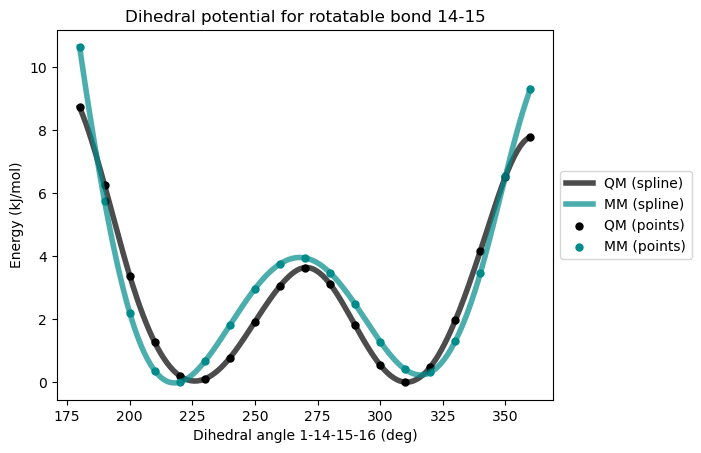

* Info * Fitting the dihedral parameters...                                                                               
* Info * Optimizing dihedral via least squares fitting...                                                                 
* Info * New fitted barriers: [1.78419921 1.0228325  1.78419921 1.78419921 1.78419921]                                    
* Info * Validating the fitted force field...                                                                             
                                                                                                                          
* Info * Summary of validation                                                                                            
* Info * ---------------------                                                                                            
* Info * Maximum difference: 1.878 kJ/mol                                                                                 
* Info * Standar

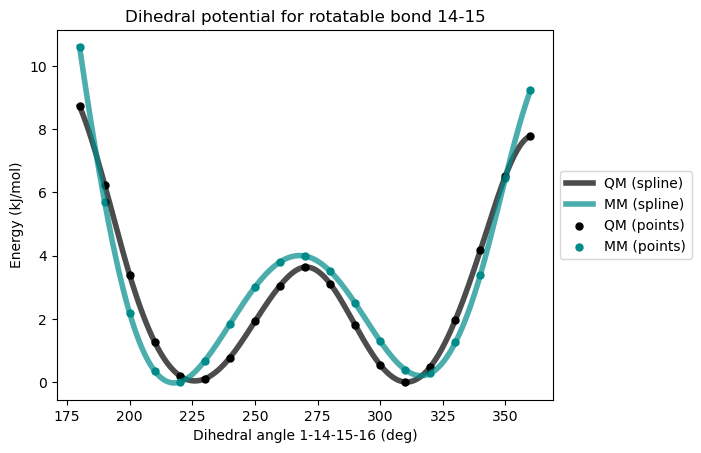

* Info * Dihedral MM parameters have been reparameterized and updated in the topology.                                    


In [18]:
ff_gen.reparameterize_dihedrals( rotatable_bond=[14, 15], scan_file='data/1-14-15-16.xyz', fit_extrema=False, visualize=True)

In [19]:
ff_gen.write_gromacs_files('hs276_v3', 'MOL')